In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/gdrive/My Drive/tweets.csv")

In [4]:
df = df[(df['tweet_creation']>1483228799) & (df['tweet_creation']<=1514764799)]

In [5]:
df['NewDateFormat'] = df['tweet_creation'].apply(lambda x: datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))

In [6]:
df["week"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%U"))
df["month"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%m"))

In [8]:
groupDf = df[['user_id', 'qt_flag', 'rt_flag', 'week', 'month']]

In [9]:
unique_values_week = groupDf['week'].unique()
unique_values_month = groupDf['month'].unique()
unique_values_week.sort()
unique_values_month.sort()

#Plot 6

In [19]:
plot6ArrOriginal = []
plot6ArrRetweet = []
plot6ArrQuoted = []

In [20]:
def countTweetsOriginal(weekIn):
    weekDf = groupDf[groupDf['week'] == weekIn]
    totalTweets = len(weekDf)
    tempDf = weekDf[(weekDf['qt_flag'] == False) & (weekDf['rt_flag'] == False)]
    percentage = (len(tempDf)/totalTweets)*100
    return plot6ArrOriginal.append(percentage)  

In [21]:
def countTweetsRetweet(weekIn):
    weekDf = groupDf[groupDf['week'] == weekIn]
    totalTweets = len(weekDf)
    tempDf = weekDf[(weekDf['qt_flag'] == False) & (weekDf['rt_flag'] == True)]
    percentage = (len(tempDf)/totalTweets)*100
    return plot6ArrRetweet.append(percentage)  

In [22]:
def countTweetsQuoted(weekIn):
    weekDf = groupDf[groupDf['week'] == weekIn]
    totalTweets = len(weekDf)
    tempDf = weekDf[(weekDf['qt_flag'] == True) & (weekDf['rt_flag'] == False)]
    percentage = (len(tempDf)/totalTweets)*100
    return plot6ArrQuoted.append(percentage)  

In [23]:
for i in unique_values_week:
  countTweetsOriginal(i)

In [24]:
for i in unique_values_week:
  countTweetsRetweet(i)

In [25]:
for i in unique_values_week:
  countTweetsQuoted(i)

In [26]:
plot6XAxis = unique_values_week

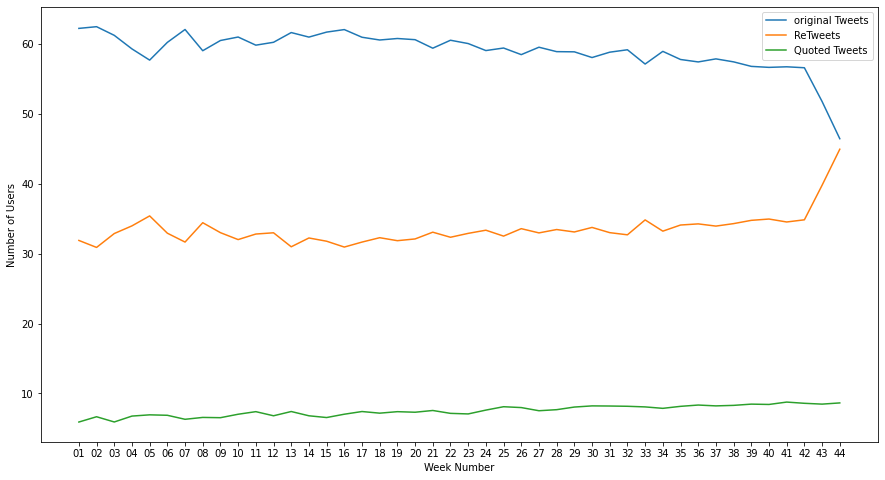

In [31]:
plt.figure(figsize=(15,8))
plt.plot(plot6XAxis, plot6ArrOriginal, label='original Tweets')
plt.plot(plot6XAxis, plot6ArrRetweet, label='ReTweets')
plt.plot(plot6XAxis, plot6ArrQuoted, label='Quoted Tweets')

plt.xlabel("Week Number")
plt.ylabel("Number of Users")
plt.legend(loc='best')
plt.show()

#Plot 7
#subplot 1